In [36]:
import numpy as np
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
filename='lightcurve.csv'
df = pd.read_csv(filename)

In [37]:
len(df.utc)

1361

In [38]:
dim=len(df.utc)
t=np.linspace(0, (dim-1)*4, dim)


In [39]:
pprint(df.columns)

Index(['utc', 'ebin1', 'ebin2', 'ebin3', 'ebin4', 'ebin5'], dtype='object')


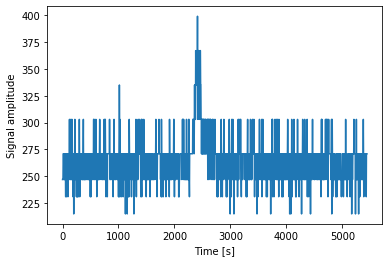

In [40]:

plt.plot(t, df['ebin1'])
plt.xlabel('Time [s]')
plt.ylabel('Signal amplitude');
plt.show()

In [41]:
from scipy import fftpack
fs=0.25
X=fftpack.fft(df['ebin1'])
freqs=fftpack.fftfreq(dim)*fs

Text(0, 0.5, 'Amplitude')

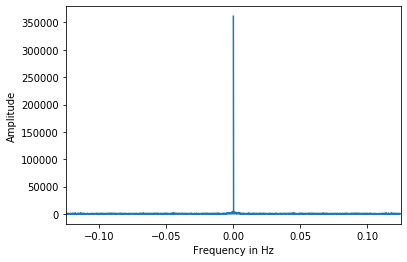

In [50]:
plt.xlim(-fs/2., fs/2.)
plt.plot(freqs, np.abs(X))
plt.xlabel('Frequency in Hz')
plt.ylabel('Amplitude')

In [51]:
pprint(np.abs(X))

array([361359.        ,   4206.34180956,   3340.87321886, ...,
         3896.71394361,   3340.87321886,   4206.34180956])


In [52]:
X

array([361359.           +0.j        ,  -3998.12720834-1307.0157783j ,
         2816.67453462+1796.60191208j, ...,
        -2424.53314077+3050.57676639j,   2816.67453462-1796.60191208j,
        -3998.12720834+1307.0157783j ])

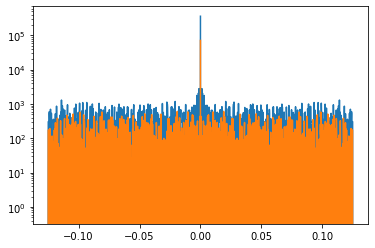

In [64]:
freqY=[]
#plt.xlim(-fs/2., fs/2.)
for i in range(0,2):
    name='ebin{}'.format(i+1)
    freqY.append([x.real for x in np.fft.fft(df[name])])
    plt.plot(freqs, freqY[i],label=name)

plt.yscale('log')
plt.show()

